In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"

# Ch03 无监督学习与预处理

## 3.4 降维、特征提取与流形学习

降维的目的在于提取有用的特征，将每个数据点分解成一些分量的加权求和。

### 3.4.1 主成分分析 ( Principal Component Analysis, PCA )

PCA 将数据分解成正交分量，并且能够解释尽可能多的数据方差。


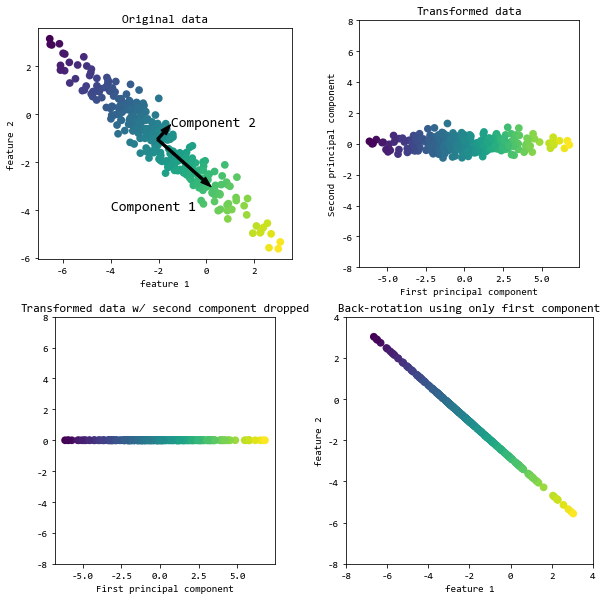

In [2]:
mglearn.plots.plot_pca_illustration()

#### 1. 对cancer数据集应用PCA并进行可视化

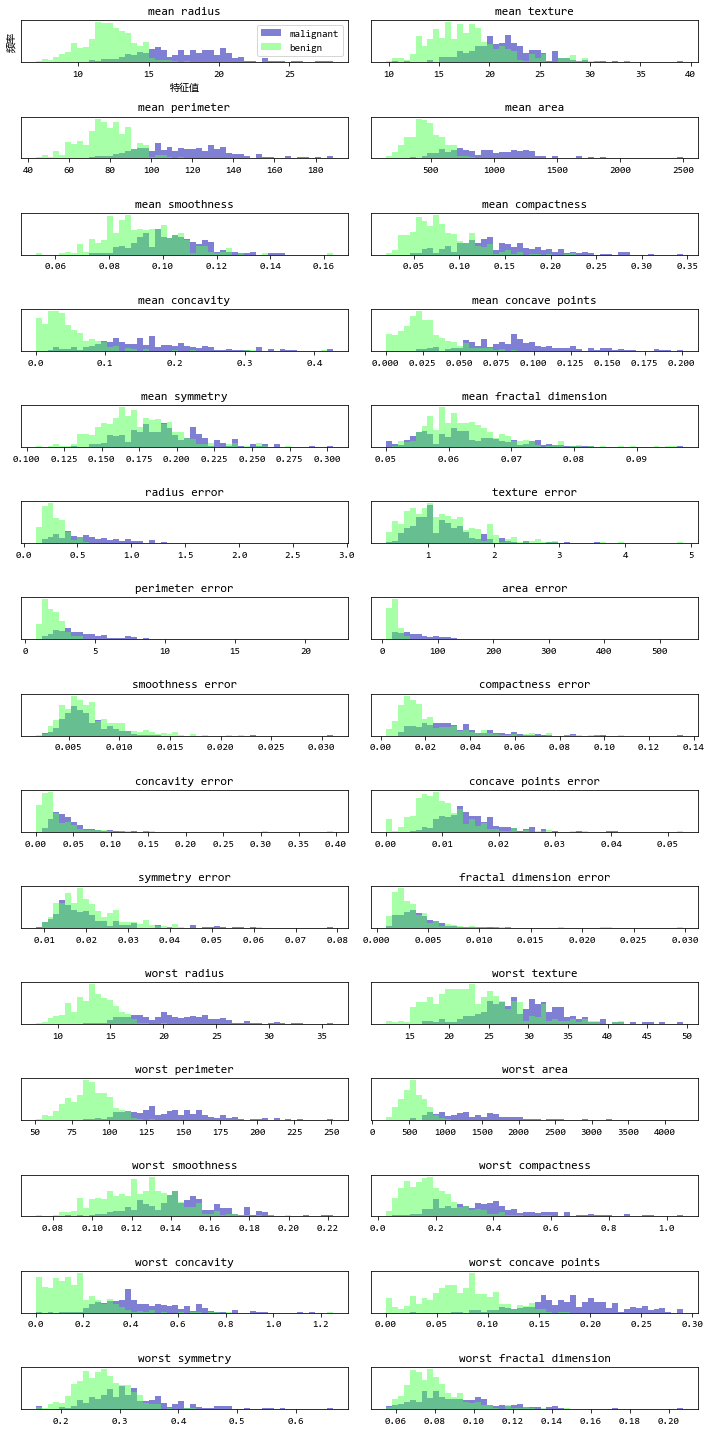

In [3]:
# 乳腺癌数据的特征直方图，可以发现许多数据没有可分性
fig, axes = plt.subplots(15, 2, figsize=(10, 20))

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("特征值")
ax[0].set_ylabel("频率")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [4]:
# PCA 之前需要预处理数据
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [5]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("原始数据.shape: {}".format(str(X_scaled.shape)))
print("降维数据.shape: {}".format(str(X_pca.shape)))

原始数据.shape: (569, 30)
降维数据.shape: (569, 2)


Text(0, 0.5, '第二主成分')

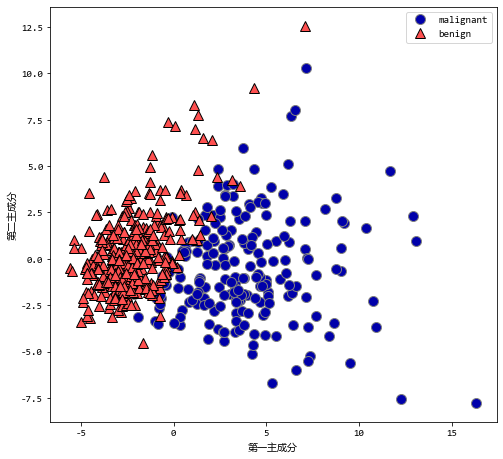

In [6]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("第一主成分")
plt.ylabel("第二主成分")

In [7]:
print("主成分.shape: {}".format(pca.components_.shape))

主成分.shape: (2, 30)


In [8]:
print("主成分的成分:\n{}".format(pca.components_))

主成分的成分:
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064  0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103  0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251
   0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367 -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008
   0.142  0.275]]


Text(0, 0.5, '主成分')

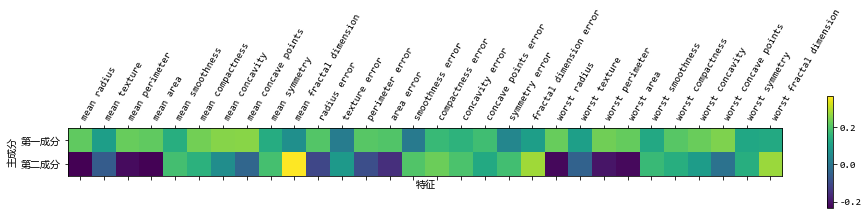

In [9]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["第一成分", "第二成分"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("特征")
plt.ylabel("主成分")

#### 2. 特征提取的特征脸
特征提取是一种数据表示，比原始表示更适合于分析。
例如：提取的特征脸是脸部照片中变化最大的地方，即人脸的细节，那些细节代表着光影变化较大的地方，比如：轮廓、皱纹等等
某些类别的数据过多，会导致数据偏斜，可以通过限制每个类别的数据量来解决

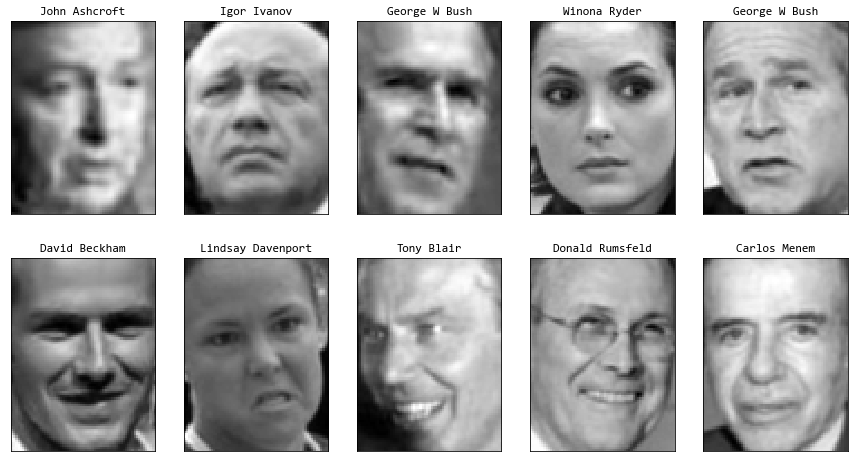

In [10]:
# 将文件 `lfw_home.zip` 解压到 `~/scikit-learn_data` 目录下
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

# 显示原始人脸照片
fig, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [11]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (2749, 87, 65)
Number of classes: 52


In [12]:
# count how often each target appears
counts = np.bincount(people.target)
print("前二十一个人的情况。")
print('{0:25} {1:6}'.format("姓名", "照片数目"))
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:6}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

前二十一个人的情况。
姓名                        照片数目      
Alejandro Toledo                  39   Alvaro Uribe                      35   Amelie Mauresmo                   21   
Andre Agassi                      36   Ariel Sharon                      77   Arnold Schwarzenegger             42   
Atal Bihari Vajpayee              24   Bill Clinton                      29   Carlos Menem                      21   
Colin Powell                     236   David Beckham                     31   Donald Rumsfeld                  121   
George Robertson                  22   George W Bush                    530   Gerhard Schroeder                109   
Gloria Macapagal Arroyo           44   Gray Davis                        26   Hamid Karzai                      22   
Hans Blix                         39   Hugo Chavez                       71   Igor Ivanov                       20   
Jack Straw                        28   Jacques Chirac                    52   Jean Chretien                     55   
Jennifer

In [13]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    # 将每个人的前50条数据设置为1，方便取出
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
# 将灰度值缩放到[0,1]之间，而不是[0,255]之间，可以得到更好的数据稳定性
X_people = X_people / 255.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

# 使用 1 个邻居的 K近邻分类器
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("原始数据经过KNN训练后测试集的精度： {:.2f}".format(knn.score(X_test, y_test)))

原始数据经过KNN训练后测试集的精度： 0.27


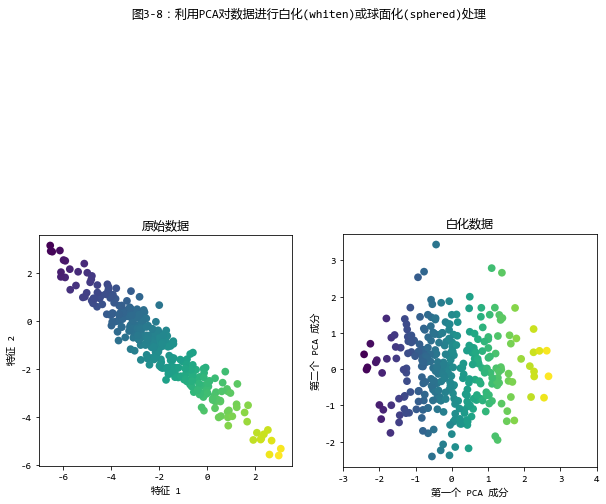

In [15]:
# 白化（whitening）或者球面化(sphered)：变换后的向量 $\mathbfb{z}=[z_1,\cdots,z_n]^T$ 是零均值、单位方差，并且元素$z_i$是不相关的 $E{z_i z_j}=\delta_{ij}$
# StandScaler 变换后的信号为零均值、单位方差，但是不保证信号之间不相关，即不保证信号分布为圆形，但是可以保证信号分布为椭圆形
# 零均值、单位方差的多元高斯密度是符合白化标准的；反之则不成立，因为球面微量的密度不一定是径向对称的
mglearn.plots.plot_pca_whitening()

In [16]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1341, 100)


In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("测试集精度： {:.2f}".format(knn.score(X_test_pca, y_test)))

测试集精度： 0.35


In [18]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


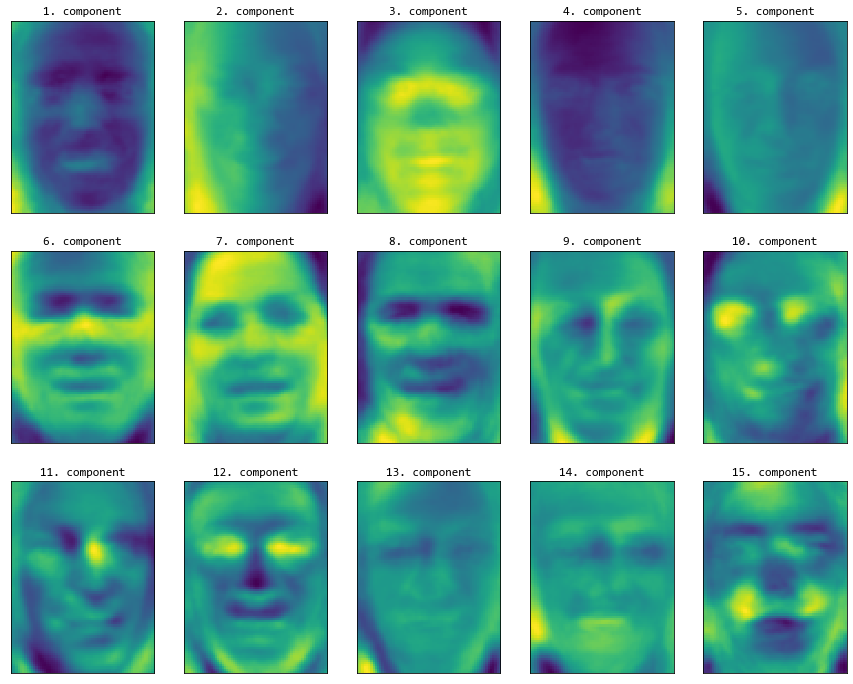

In [19]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

In [20]:
# FIXME hide this!
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=7, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=7,cmap="viridis")

    ab = AnnotationBbox(imagebox, (.3 + .2 * i, 0.4),pad=0.0,xycoords='data')
    ax.add_artist(ab)
    if i == 0:
        plt.text(.18, .25, 'x_{} *'.format(i), fontdict={'fontsize': 50})
    else:
        plt.text(.15 + .2 * i, .25, '+ x_{} *'.format(i),fontdict={'fontsize': 50})

plt.text(.95, .25, '+ ...', fontdict={'fontsize': 50})
plt.text(.13, .3, r'\approx', fontdict={'fontsize': 50})
plt.axis("off")
plt.savefig("images/03-face_decomposition.png")
plt.close()

![decomposition](images/03-face_decomposition.png)

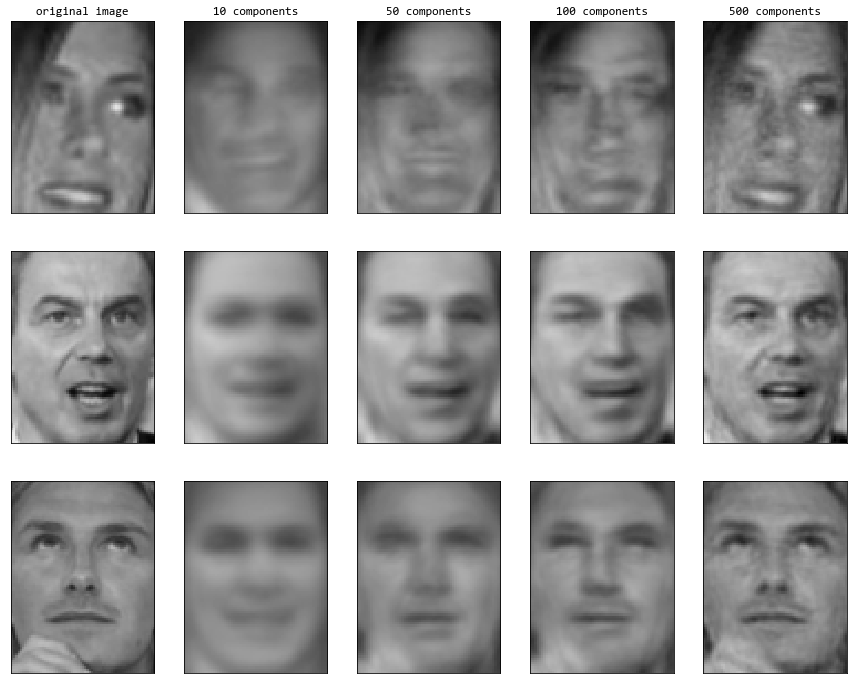

In [21]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, '第二个主成分')

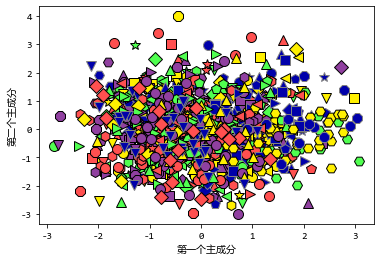

In [22]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('第一个主成分')
plt.ylabel('第二个主成分')

### 3.4.2. NMF.非负矩阵分解

-   NMF 将数据分解成非负分量，并且系数也是非负的。NMF 的分量更容易解释。
    -   两个分量的 NMF，所有数据点都可以写成这两个分量的正数组合
    -   一个分量的 NMF，分量会指向数据的平均值
    -   如果有足够多的分量重建数据(分量个数与特征个数相同)，算法会选择指向数据极值的方向
        -   分量数目的改变会导致分量的改变
        -   所有分量的地位平等
        -   初始化时的不同的随机种子会产生不同的分量结果
-   NMF 设定的分量个数不一样，产生的分量的内容也不一样。
-   NMF 所有分量的地位平等。
-   NMF 比较适合于具有叠加结构的数据，包括：音频、基因表达和文本数据。

#### 1. 将 NMF 应用于模拟数据

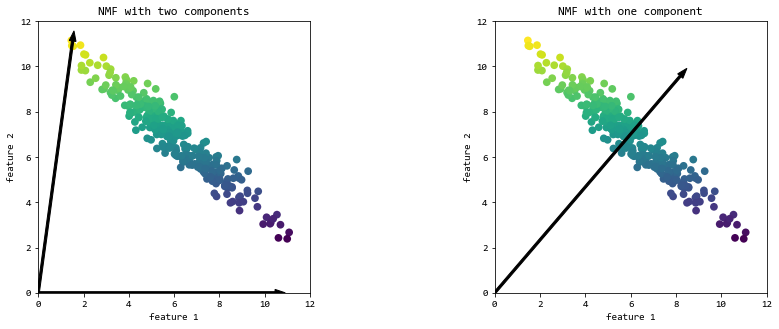

In [23]:
mglearn.plots.plot_nmf_illustration()

#### 2. 将 NMF 应用于人脸图像

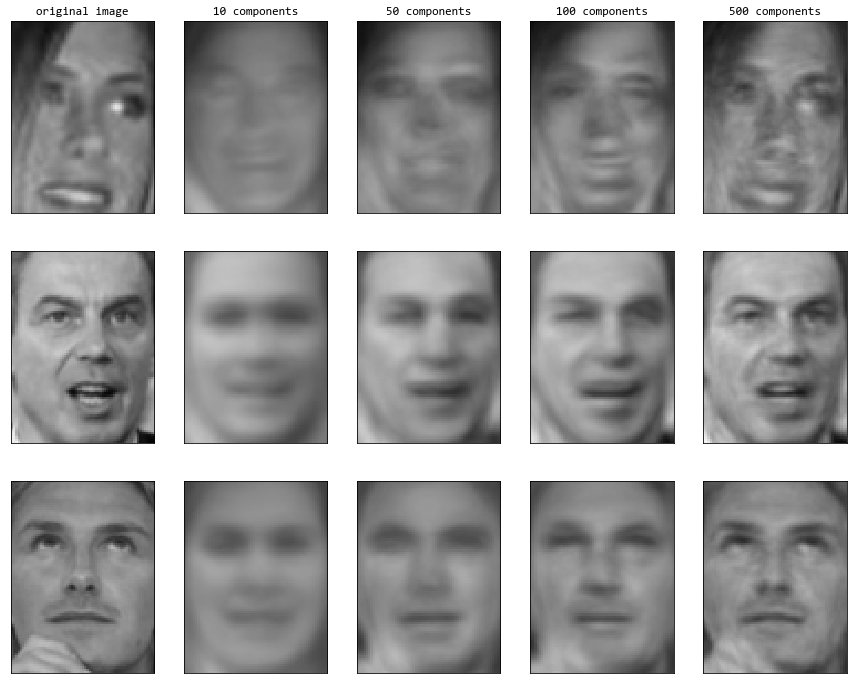

In [24]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

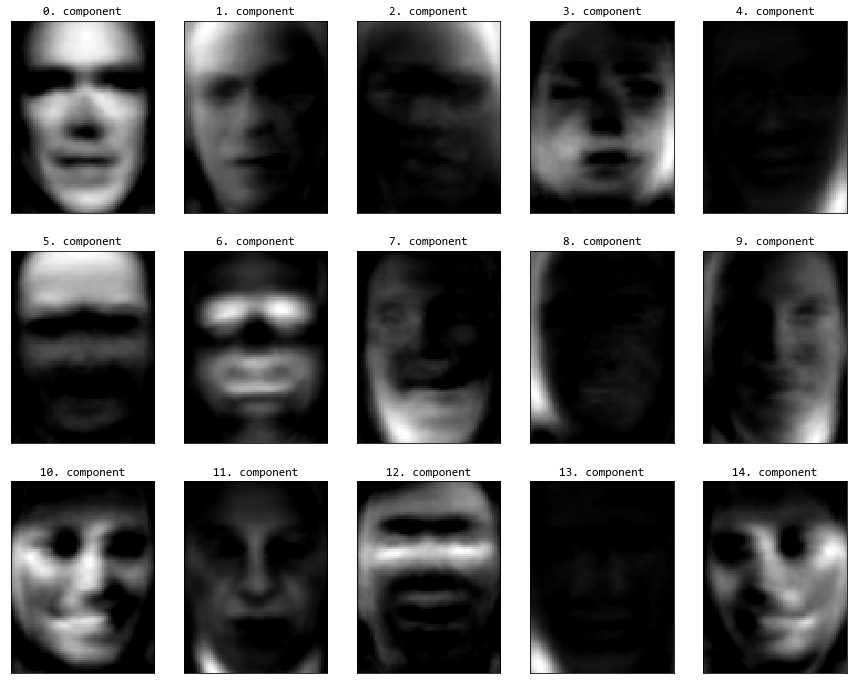

In [25]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

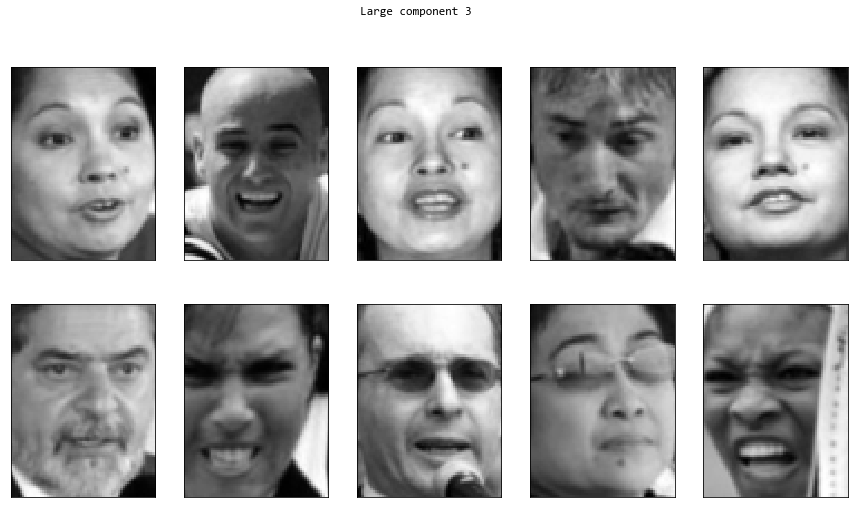

In [26]:
compn = 3
# 图3-16 第3个分量的系数较大的人脸
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

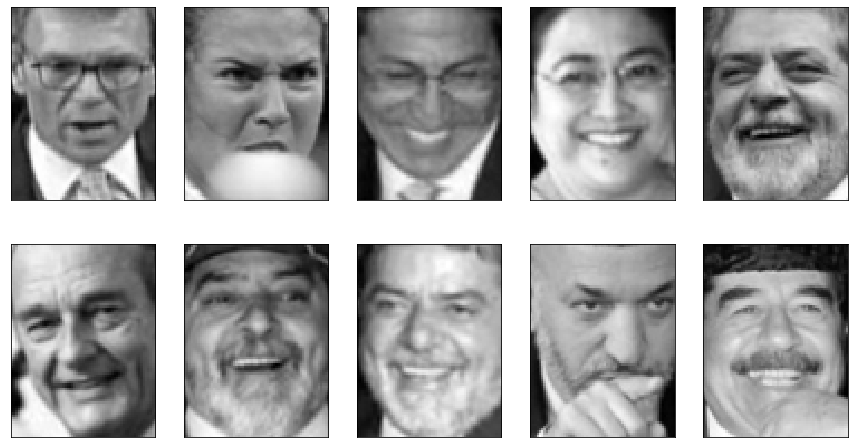

In [27]:
compn = 7
# 图3-16 第7个分量的系数较大的人脸
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

#### 将 NMF 应用于盲源信号分离

Text(0.5, 0.98, '图3-18：原始信号源')

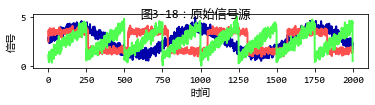

In [28]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-') 
plt.xlabel("时间")
plt.ylabel("信号")
plt.suptitle("图3-18：原始信号源")

In [29]:
# 将数据混合成 100 维的状态
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [30]:
# 使用 NMF 来还原这三个信号
# 注意：这是个超定信号恢复问题，恢复的只是这三个信号的形状，无法恢复这三个信号的尺度
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [31]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

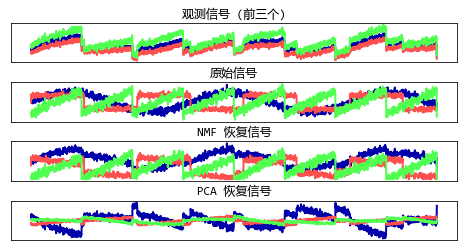

In [32]:
# PCA 的第一个主成分取走了混合信号中的大部分信息量，缺少对信号时间上的相关性考虑
models = [X, S, S_, H]
names = ['观测信号 (前三个)',
         '原始信号',
         'NMF 恢复信号',
         'PCA 恢复信号']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

### 3.4.3 使用 t-SNE 进行流形学习

流形学习算法 ( Manifold Learning ) 是一类可以用于可视化的算法，允许更加复杂的映射，
给出更好的可视化效果。

t-SNE 算法：计算训练数据的新的表示，不允许变换新的数据，不能用于测试集，只能用于变换训练集。
可以用于探索性数据分析，找到数据的二维表示，尽可能地保持数据点之间的距离。重点关注距离较近的点。


In [33]:
from sklearn.datasets import load_digits
digits = load_digits()
print("手写数字数据集的形状= {}".format(digits.data.shape))  # (1797, 64)
print("手写数字数据集中图片的形状= {}".format(digits.images.shape))  # (1797, 8, 8)

手写数字数据集的形状= (1797, 64)
手写数字数据集中图片的形状= (1797, 8, 8)


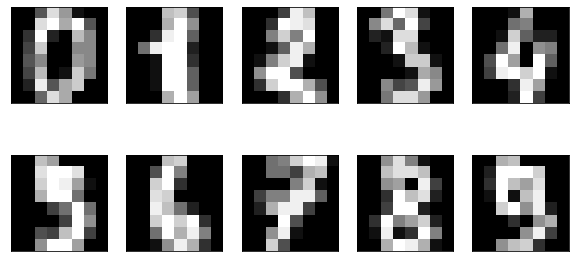

In [34]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5),subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, '第二个主成分')

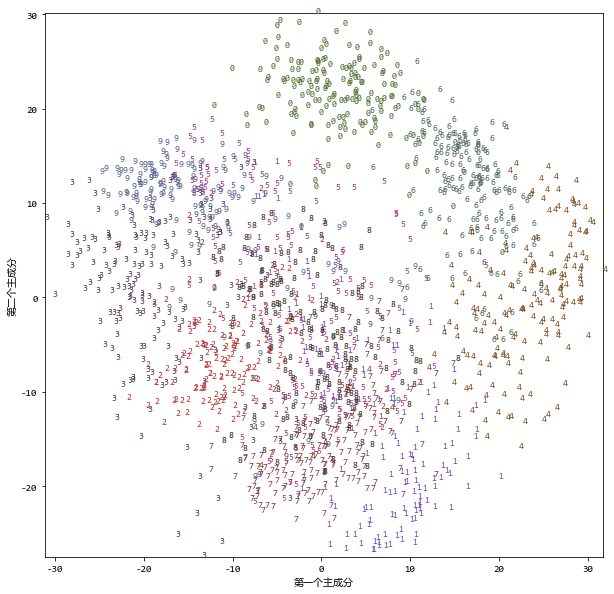

In [35]:
# 构建一个 PCA 模型
pca = PCA(n_components=2)
pca.fit(digits.data)
# 将 digits 数据变换到前两个主成分的方向上
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 将数据绘制成文本图(代替散点图)
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("第一个主成分")
plt.ylabel("第二个主成分")

In [36]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# 使用 fit_transform() 代替 fit(), 因为 TSNE 没有 transform()
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

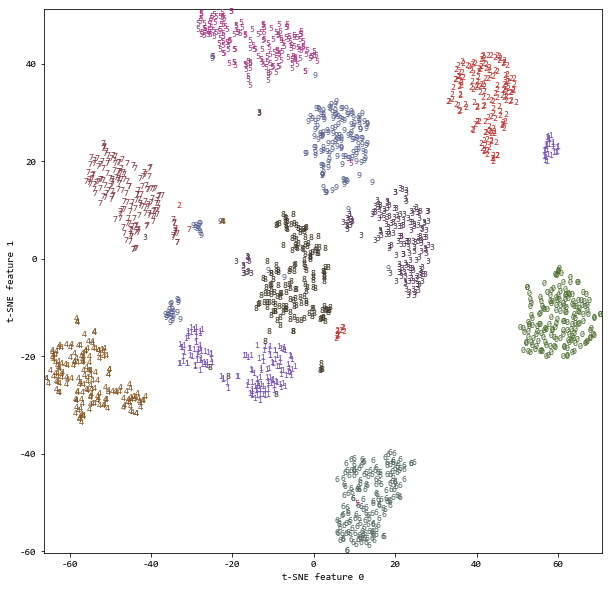

In [37]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 将数据绘制成文本图(代替散点图)
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")